# Clustering

In [1]:
import pandas as pd 
import numpy as np

In [2]:
# Objective : Put similar colleges together
coll = pd.read_csv('cluster_example.csv')

In [3]:
coll.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [4]:
coll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [5]:
#Removing the first column before scaling
coll.iloc[:,1:]

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [6]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [7]:
coll_scaled = sc.fit_transform(coll.iloc[:,1:])
coll_scaled[:5]

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691]])

# Hierarchichal Clustering

In [8]:
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
link = linkage(coll_scaled,method='ward')
link

array([[11.        , 21.        ,  0.40302804,  2.        ],
       [ 8.        , 24.        ,  0.5087704 ,  2.        ],
       [12.        , 22.        ,  0.51397265,  2.        ],
       [ 5.        ,  6.        ,  0.66550071,  2.        ],
       [16.        , 28.        ,  0.75373329,  3.        ],
       [ 4.        ,  7.        ,  0.79027529,  2.        ],
       [10.        , 29.        ,  0.91291034,  4.        ],
       [ 0.        , 30.        ,  0.98118295,  3.        ],
       [ 3.        , 25.        ,  1.08900583,  3.        ],
       [14.        , 26.        ,  1.30438388,  3.        ],
       [32.        , 33.        ,  1.37852121,  6.        ],
       [31.        , 34.        ,  1.44265322,  7.        ],
       [13.        , 23.        ,  1.49124404,  2.        ],
       [19.        , 35.        ,  1.98145569,  7.        ],
       [ 1.        ,  9.        ,  2.09832721,  2.        ],
       [27.        , 38.        ,  2.18701731,  9.        ],
       [15.        , 37.

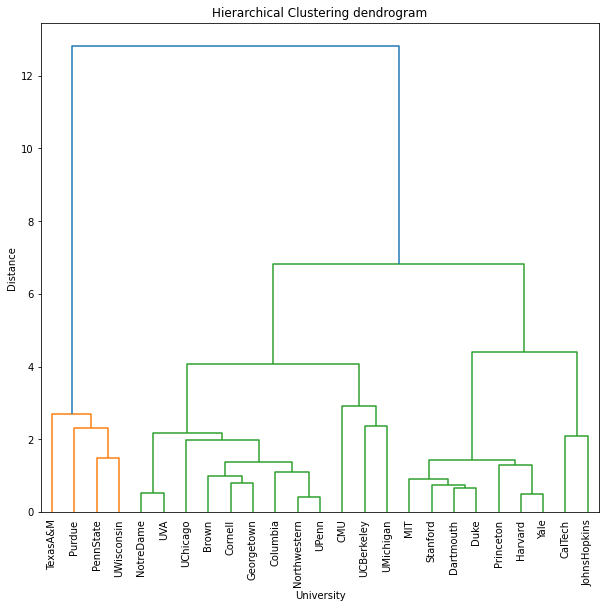

In [16]:
# Plot on dendrogram
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,9))
plt.xlabel('University')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering dendrogram')
lab = np.array(coll['Univ'])
dendrogram(link,labels=lab,leaf_font_size=10,leaf_rotation=90);

In [19]:
#Assignment of clusters
cluster_label = fcluster(link,t=4,criterion='maxclust')
cluster_label

array([2, 4, 2, 2, 2, 3, 3, 2, 3, 4, 3, 2, 2, 1, 3, 1, 3, 1, 2, 2, 2, 2,
       2, 1, 3], dtype=int32)

In [20]:
clus_coll = coll.assign(Cluster_no = cluster_label)
clus_coll

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster_no
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,4
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,3
6,Duke,1315,90,30,12,31585,95,3
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,3
9,JohnsHopkins,1305,75,44,7,58691,87,4


In [21]:
# Properties of different types of colleges
clus_coll.groupby(by='Cluster_no')['Expenses'].mean()

Cluster_no
1     9953.000000
2    22858.000000
3    35475.142857
4    61133.000000
Name: Expenses, dtype: float64

# Kmeans

#### n_clusters=k
#### init=how the seeds are initialised (random,k-means++),n_init=no of times the algorithm will be run with different centroid  seeds
#### max_iter = max no of times the algo needs to be executed for a single run 
#### algorithm: 'auto/elkan'

In [23]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4,init='k-means++',n_init=10,max_iter=30)
km

KMeans(max_iter=30, n_clusters=4)

In [24]:
# Fit the model on the scaled data
km.fit(coll_scaled)

KMeans(max_iter=30, n_clusters=4)

In [25]:
km.labels_

array([0, 3, 2, 0, 2, 0, 0, 2, 0, 3, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0])

In [26]:
# Inertia : Sum of Squares of points inside the combined cluster
km.inertia_

33.654341806512235

In [27]:
# Cluster centers
km.cluster_centers_

array([[ 0.80273428,  0.68086062, -0.90136381, -0.43159988,  0.44062556,
         0.79526289],
       [-1.93029211, -1.98148647,  1.59348244,  1.63857398, -1.23359906,
        -1.68680366],
       [-0.12658888,  0.06407139,  0.2224667 ,  0.04516743, -0.38064332,
         0.02028221],
       [ 0.88122441,  0.5787432 , -0.24316128, -1.56078563,  2.38759968,
        -0.3064867 ]])

In [28]:
# No. of iterations required for completing modelling 
km.n_iter_

5

## Calculation of optimum no of clusters

In [30]:
ssw = []
for i in range(1,16):
   clus_model = KMeans(n_clusters=i,init='k-means++',max_iter=10)
   clus_model.fit(coll_scaled)
   ssw.append(clus_model.inertia_)

ssw


C:\Users\piyus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[149.99999999999997,
 64.1452839501027,
 44.531761731450956,
 33.654341806512235,
 26.63635511728335,
 23.219346413634412,
 18.87250712129735,
 15.919337999477898,
 13.161014731247565,
 10.981061709811025,
 8.527513545246267,
 6.534490032010418,
 5.493016111483617,
 4.324902340905162,
 3.5022316008307435]

In [31]:
ssw_df = pd.DataFrame()
ssw_df['Cluster no.'] = range(1,16)
ssw_df['SumOfSq_Within']= ssw
ssw_df

,Cluster no.,SumOfSq_Within
0,1,150.000000
1,2,64.145284
2,3,44.531762
3,4,33.654342
4,5,26.636355
5,6,23.219346
6,7,18.872507
7,8,15.919338
8,9,13.161015
9,10,10.981062


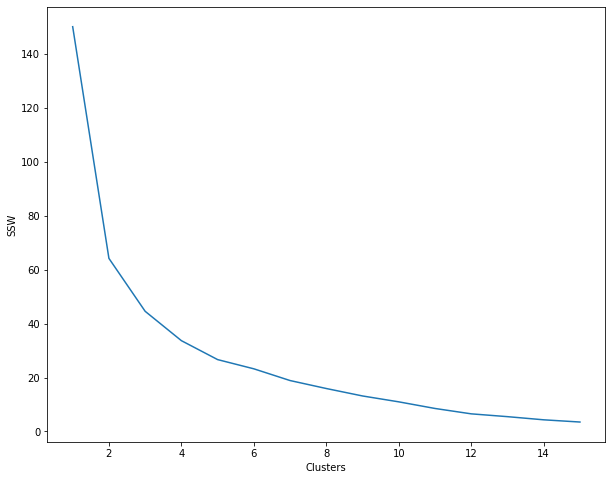

In [33]:
# Elbow Curve
plt.figure(figsize=(10,8))
plt.xlabel('Clusters')
plt.ylabel('SSW')
plt.plot(ssw_df['Cluster no.'],ssw_df['SumOfSq_Within'])